In [1]:
import opensim as osim
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from data_utils import *

In [2]:

data_dir = "..\data"
trial_names = ["walking_baseline1", 
               "walking_FBexp1_finalNoFB1", "walking_FBexp1_finalFB1",
               "walking_FBcolor1_finalNoFB1", "walking_FBcolor1_finalFB1",
               "walking_FBcolor2_finalNoFB1", "walking_FBcolor2_finalFB1",
               "walking_retention1"]
# num_trials = len(trial_names)

subject_id = np.linspace(1, 9, 9).astype(int)
num_subjects = len(subject_id)

grf_file_tag = "forces.mot"
muscle_file_tag = "forces.sto"

In [3]:
grf_x_segments = []
grf_y_segments = []
grf_z_segments = []

tibpost_segments = []
tibant_segments = []
edl_segments = []
ehl_segments = []
fdl_segments = []
fhl_segments = []
gaslat_segments = []
gasmed_segments = []
soleus_segments = []
perbrev_segments = []
perlong_segments = []
achilles_segments = []

for i in range(num_subjects):
    for trial in trial_names:
        grf_file_path = f"{data_dir}\\Subject{subject_id[i]}\\ExpmtlData\\GRF\\{trial}_{grf_file_tag}"
        muscle_file_path = f"{data_dir}\\Subject{subject_id[i]}\\StaticOpt\\{trial}\\results_{muscle_file_tag}"
        
        grf_storage = osim.Storage(grf_file_path)
        muscle_storage = osim.Storage(muscle_file_path)
        
        time_grf_col = osim.ArrayDouble()
        grf_x_r_col = osim.ArrayDouble()
        grf_y_r_col = osim.ArrayDouble()
        grf_z_r_col = osim.ArrayDouble()
        grf_x_l_col = osim.ArrayDouble()
        grf_y_l_col = osim.ArrayDouble()
        grf_z_l_col = osim.ArrayDouble()
        
        tibpost_r_col = osim.ArrayDouble()
        tibant_r_col = osim.ArrayDouble()
        edl_r_col = osim.ArrayDouble()
        ehl_r_col = osim.ArrayDouble()
        fdl_r_col = osim.ArrayDouble()
        fhl_r_col = osim.ArrayDouble()
        gaslat_r_col = osim.ArrayDouble()
        gasmed_r_col = osim.ArrayDouble()
        soleus_r_col = osim.ArrayDouble()
        perbrev_r_col = osim.ArrayDouble()
        perlong_r_col = osim.ArrayDouble()
        
        tibpost_l_col = osim.ArrayDouble()
        tibant_l_col = osim.ArrayDouble()
        edl_l_col = osim.ArrayDouble()
        ehl_l_col = osim.ArrayDouble()
        fdl_l_col = osim.ArrayDouble()
        fhl_l_col = osim.ArrayDouble()
        gaslat_l_col = osim.ArrayDouble()
        gasmed_l_col = osim.ArrayDouble()
        soleus_l_col = osim.ArrayDouble()
        perbrev_l_col = osim.ArrayDouble()
        perlong_l_col = osim.ArrayDouble()

        grf_storage.getTimeColumn(time_grf_col)
        grf_storage.getDataColumn('ground_force_vx', grf_x_r_col)
        grf_storage.getDataColumn('ground_force_vy', grf_y_r_col)
        grf_storage.getDataColumn('ground_force_vz', grf_z_r_col)
        grf_storage.getDataColumn('1_ground_force_vx', grf_x_l_col)
        grf_storage.getDataColumn('1_ground_force_vy', grf_y_l_col)
        grf_storage.getDataColumn('1_ground_force_vz', grf_z_l_col)
        
        muscle_storage.getDataColumn('tibpost_r', tibpost_r_col)
        muscle_storage.getDataColumn('tibant_r', tibant_r_col)
        muscle_storage.getDataColumn('edl_r', edl_r_col)
        muscle_storage.getDataColumn('ehl_r', ehl_r_col)
        muscle_storage.getDataColumn('fdl_r', fdl_r_col)
        muscle_storage.getDataColumn('fhl_r', fhl_r_col)
        muscle_storage.getDataColumn('gaslat_r', gaslat_r_col)
        muscle_storage.getDataColumn('gasmed_r', gasmed_r_col)
        muscle_storage.getDataColumn('soleus_r', soleus_r_col)
        muscle_storage.getDataColumn('perbrev_r', perbrev_r_col)
        muscle_storage.getDataColumn('perlong_r', perlong_r_col)
        
        muscle_storage.getDataColumn('tibpost_l', tibpost_l_col)
        muscle_storage.getDataColumn('tibant_l', tibant_l_col)
        muscle_storage.getDataColumn('edl_l', edl_l_col)
        muscle_storage.getDataColumn('ehl_l', ehl_l_col)
        muscle_storage.getDataColumn('fdl_l', fdl_l_col)
        muscle_storage.getDataColumn('fhl_l', fhl_l_col)
        muscle_storage.getDataColumn('gaslat_l', gaslat_l_col)
        muscle_storage.getDataColumn('gasmed_l', gasmed_l_col)
        muscle_storage.getDataColumn('soleus_l', soleus_l_col)
        muscle_storage.getDataColumn('perbrev_l', perbrev_l_col)
        muscle_storage.getDataColumn('perlong_l', perlong_l_col)
        
        time_grf = ad2float(time_grf_col)
        grf_x_r = ad2float(grf_x_r_col)
        grf_y_r = ad2float(grf_y_r_col)
        grf_z_r = ad2float(grf_z_r_col)
        grf_x_l = ad2float(grf_x_l_col)
        grf_y_l = ad2float(grf_y_l_col)
        grf_z_l = ad2float(grf_z_l_col)
        
        tibpost_r = ad2float(tibpost_r_col)
        tibant_r = ad2float(tibant_r_col)
        edl_r = ad2float(edl_r_col)
        ehl_r = ad2float(ehl_r_col)
        fdl_r = ad2float(fdl_r_col)
        fhl_r = ad2float(fhl_r_col)
        gaslat_r = ad2float(gaslat_r_col)
        gasmed_r = ad2float(gasmed_r_col)
        soleus_r = ad2float(soleus_r_col)
        perbrev_r = ad2float(perbrev_r_col)
        perlong_r = ad2float(perlong_r_col)
        
        tibpost_l = ad2float(tibpost_l_col)
        tibant_l = ad2float(tibant_l_col)
        edl_l = ad2float(edl_l_col)
        ehl_l = ad2float(ehl_l_col)
        fdl_l = ad2float(fdl_l_col)
        fhl_l = ad2float(fhl_l_col)
        gaslat_l = ad2float(gaslat_l_col)
        gasmed_l = ad2float(gasmed_l_col)
        soleus_l = ad2float(soleus_l_col)
        perbrev_l = ad2float(perbrev_l_col)
        perlong_l = ad2float(perlong_l_col)
        
        seg_end_pairs_r = np.where(np.diff(grf_y_r > 0) == 1)[0] + 1
        seg_end_pairs_l = np.where(np.diff(grf_y_l > 0) == 1)[0] + 1
        
        if grf_y_r[0] > 0:
            seg_end_pairs_r = seg_end_pairs_r[1:]
        
        if grf_y_l[0] > 0:
            seg_end_pairs_l = seg_end_pairs_l[1:]
        
        num_seg_r = len(seg_end_pairs_r) // 2
        num_seg_l = len(seg_end_pairs_l) // 2
        
        for j in range(num_seg_r):
            start_idx = seg_end_pairs_r[2 * j] - 1
            end_idx = seg_end_pairs_r[2 * j + 1] + 1
            
            grf_x_seg = grf_x_r[start_idx:end_idx]
            grf_y_seg = grf_y_r[start_idx:end_idx]
            grf_z_seg = grf_z_r[start_idx:end_idx]
            
            tibpost_seg = tibpost_r[start_idx:end_idx]
            tibant_seg = tibant_r[start_idx:end_idx]
            edl_seg = edl_r[start_idx:end_idx]
            ehl_seg = ehl_r[start_idx:end_idx]
            fdl_seg = fdl_r[start_idx:end_idx]
            fhl_seg = fhl_r[start_idx:end_idx]
            gaslat_seg = gaslat_r[start_idx:end_idx]
            gasmed_seg = gasmed_r[start_idx:end_idx]
            soleus_seg = soleus_r[start_idx:end_idx]
            perbrev_seg = perbrev_r[start_idx:end_idx]
            perlong_seg = perlong_r[start_idx:end_idx]
            achilles_seg = np.sum(np.array([gaslat_seg, gasmed_seg, soleus_seg]), axis=0)
            
            grf_x_segments.append(grf_x_seg)
            grf_y_segments.append(grf_y_seg)
            grf_z_segments.append(grf_z_seg)
            
            tibpost_segments.append(tibpost_seg)
            tibant_segments.append(tibant_seg)
            edl_segments.append(edl_seg)
            ehl_segments.append(ehl_seg)
            fdl_segments.append(fdl_seg)
            fhl_segments.append(fhl_seg)
            gaslat_segments.append(gaslat_seg)
            gasmed_segments.append(gasmed_seg)
            soleus_segments.append(soleus_seg)
            perbrev_segments.append(perbrev_seg)
            perlong_segments.append(perlong_seg)
            achilles_segments.append(achilles_seg)
            # plt.plot(grf_segment)
            
        for j in range(num_seg_l):
            start_idx = seg_end_pairs_l[2 * j] - 1
            end_idx = seg_end_pairs_l[2 * j + 1] + 1
            
            grf_x_seg = grf_x_l[start_idx:end_idx]
            grf_y_seg = grf_y_l[start_idx:end_idx]
            grf_z_seg = -grf_z_l[start_idx:end_idx]
            
            tibpost_seg = tibpost_l[start_idx:end_idx]
            tibant_seg = tibant_l[start_idx:end_idx]
            edl_seg = edl_l[start_idx:end_idx]
            ehl_seg = ehl_l[start_idx:end_idx]
            fdl_seg = fdl_l[start_idx:end_idx]
            fhl_seg = fhl_l[start_idx:end_idx]
            gaslat_seg = gaslat_l[start_idx:end_idx]
            gasmed_seg = gasmed_l[start_idx:end_idx]
            soleus_seg = soleus_l[start_idx:end_idx]
            perbrev_seg = perbrev_l[start_idx:end_idx]
            perlong_seg = perlong_l[start_idx:end_idx]
            achilles_seg = np.sum(np.array([gaslat_seg, gasmed_seg, soleus_seg]), axis=0)
            
            grf_x_segments.append(grf_x_seg)
            grf_y_segments.append(grf_y_seg)
            grf_z_segments.append(grf_z_seg)
            
            tibpost_segments.append(tibpost_seg)
            tibant_segments.append(tibant_seg)
            edl_segments.append(edl_seg)
            ehl_segments.append(ehl_seg)
            fdl_segments.append(fdl_seg)
            fhl_segments.append(fhl_seg)
            gaslat_segments.append(gaslat_seg)
            gasmed_segments.append(gasmed_seg)
            soleus_segments.append(soleus_seg)
            perbrev_segments.append(perbrev_seg)
            perlong_segments.append(perlong_seg)
            achilles_segments.append(achilles_seg)
            # plt.plot(grf_segment)


In [4]:
grf_x_segments = exclude_segments(grf_x_segments, 20, 70)
grf_y_segments = exclude_segments(grf_y_segments, 20, 70)
grf_z_segments = exclude_segments(grf_z_segments, 20, 70)
tibpost_segments = exclude_segments(tibpost_segments, 20, 70)
tibant_segments = exclude_segments(tibant_segments, 20, 70)
edl_segments = exclude_segments(edl_segments, 20, 70)
ehl_segments = exclude_segments(ehl_segments, 20, 70)
fdl_segments = exclude_segments(fdl_segments, 20, 70)
fhl_segments = exclude_segments(fhl_segments, 20, 70)
gaslat_segments = exclude_segments(gaslat_segments, 20, 70)
gasmed_segments = exclude_segments(gasmed_segments, 20, 70)
soleus_segments = exclude_segments(soleus_segments, 20, 70)
perbrev_segments = exclude_segments(perbrev_segments, 20, 70)
perlong_segments = exclude_segments(perlong_segments, 20, 70)
achilles_segments = exclude_segments(achilles_segments, 20, 70)

num_x_segments = len(grf_x_segments)
max_x_seg_len = max([len(seg) for seg in grf_x_segments])
min_x_seg_len = min([len(seg) for seg in grf_x_segments])

num_y_segments = len(grf_y_segments)
max_y_seg_len = max([len(seg) for seg in grf_y_segments])
min_y_seg_len = min([len(seg) for seg in grf_y_segments])

num_z_segments = len(grf_z_segments)
max_z_seg_len = max([len(seg) for seg in grf_z_segments])
min_z_seg_len = min([len(seg) for seg in grf_z_segments])

print(f"Number of segments (x, y, z): {num_x_segments}, {num_y_segments}, {num_z_segments}")
print(f"Max segment length (x, y, z): {max_x_seg_len}, {max_y_seg_len}, {max_z_seg_len}")
print(f"Min segment length (x, y, z): {min_x_seg_len}, {min_y_seg_len}, {min_z_seg_len}")

Number of segments (x, y, z): 13388, 13388, 13388
Max segment length (x, y, z): 56, 56, 56
Min segment length (x, y, z): 32, 32, 32


Min segment index: 6318
[  0.       119.543767 354.169159 495.027344 535.813194 582.016883
 655.009959 714.85693  739.375795 741.520753 738.163146 727.852609
 701.96737  667.505011 633.177428 603.296257 578.174123 558.152892
 547.248455 550.252218 560.55748  572.216972 585.180378 594.335775
 591.561196 570.880324 522.58908  425.054215 292.315615 165.244111
  68.301663   0.      ]


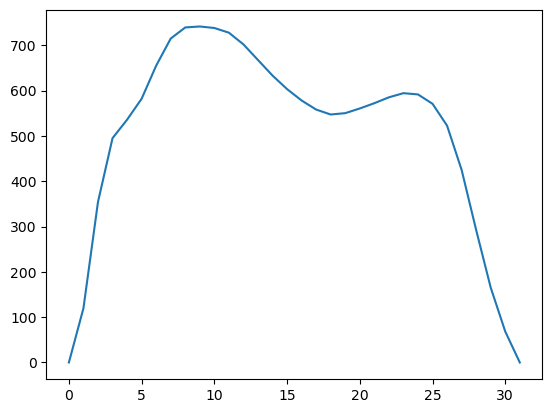

In [5]:
min_seg_idx = np.argmin([len(seg) for seg in grf_y_segments])
min_seg = grf_y_segments[min_seg_idx]
print(f"Min segment index: {min_seg_idx}")
plt.plot(min_seg)

print(min_seg)

Max segment index: 5757
[  0.        23.930106  42.732668  53.632124  78.644475 171.195637
 271.507258 318.181009 358.031489 423.437129 502.212685 565.615586
 614.403372 651.011178 675.761336 683.642308 675.748761 655.951981
 628.08254  600.037369 577.721596 564.195517 559.616901 562.280923
 568.528599 575.479625 581.442574 587.959699 596.012352 605.205131
 614.176912 623.791813 635.56279  647.29517  655.700093 658.847342
 653.500854 640.128881 622.259211 574.972176 487.297352 372.613113
 258.222037 177.225815 134.734266 110.86938   92.635111  78.91259
  67.536789  63.962918  70.546138  77.324897  74.371002  55.770946
  17.761239   0.      ]


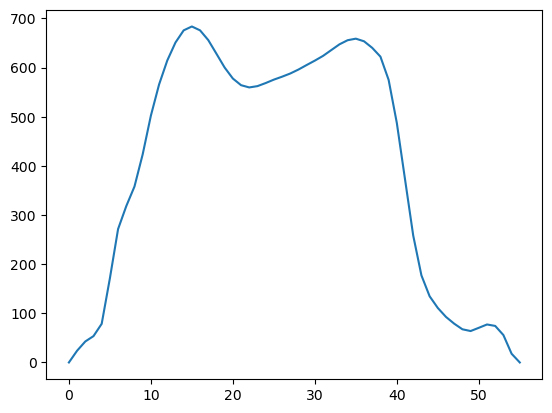

In [6]:
max_seg_idx = np.argmax([len(seg) for seg in grf_y_segments])
max_seg = grf_y_segments[max_seg_idx]
print(f"Max segment index: {max_seg_idx}")
plt.plot(max_seg)

print(max_seg)

In [7]:
n_interp_points = 100
grf_y_resampled, time_resampled = interp_segments(grf_y_segments, n_interp_points)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

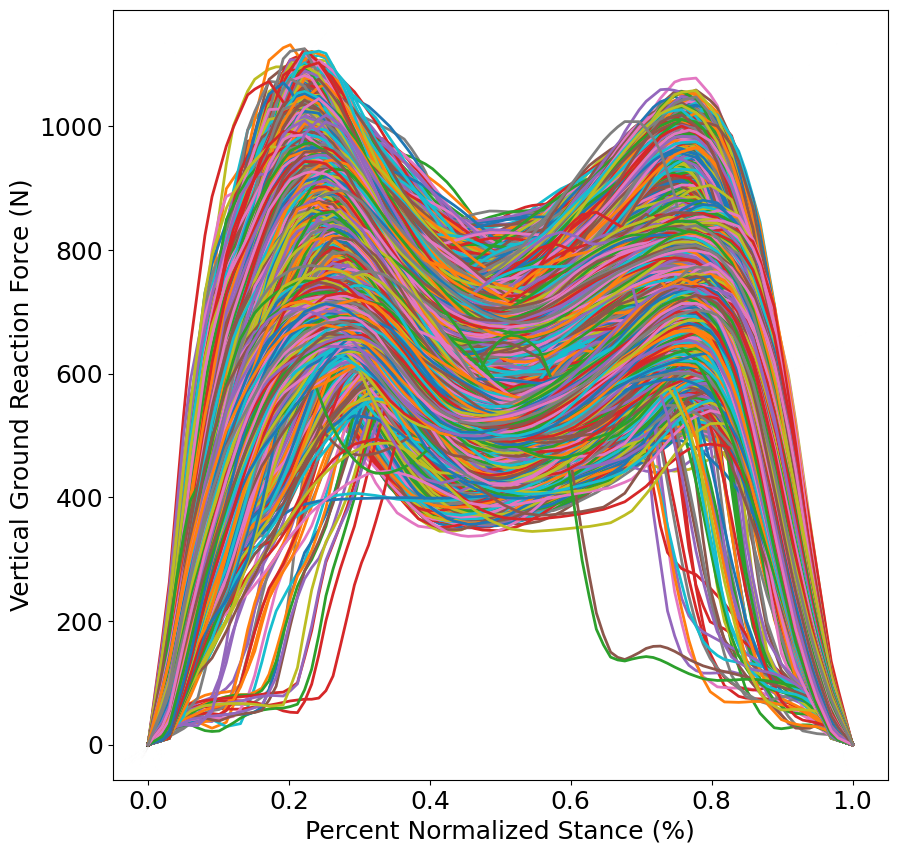

In [8]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_y_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i], grf_y_resampled[i], linewidth=2)

plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance (%)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

In [9]:
grf_x_resampled, time_resampled = interp_segments(grf_x_segments, n_interp_points)

(array([-300., -200., -100.,    0.,  100.,  200.,  300.]),
 [Text(0, -300.0, '−300'),
  Text(0, -200.0, '−200'),
  Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300')])

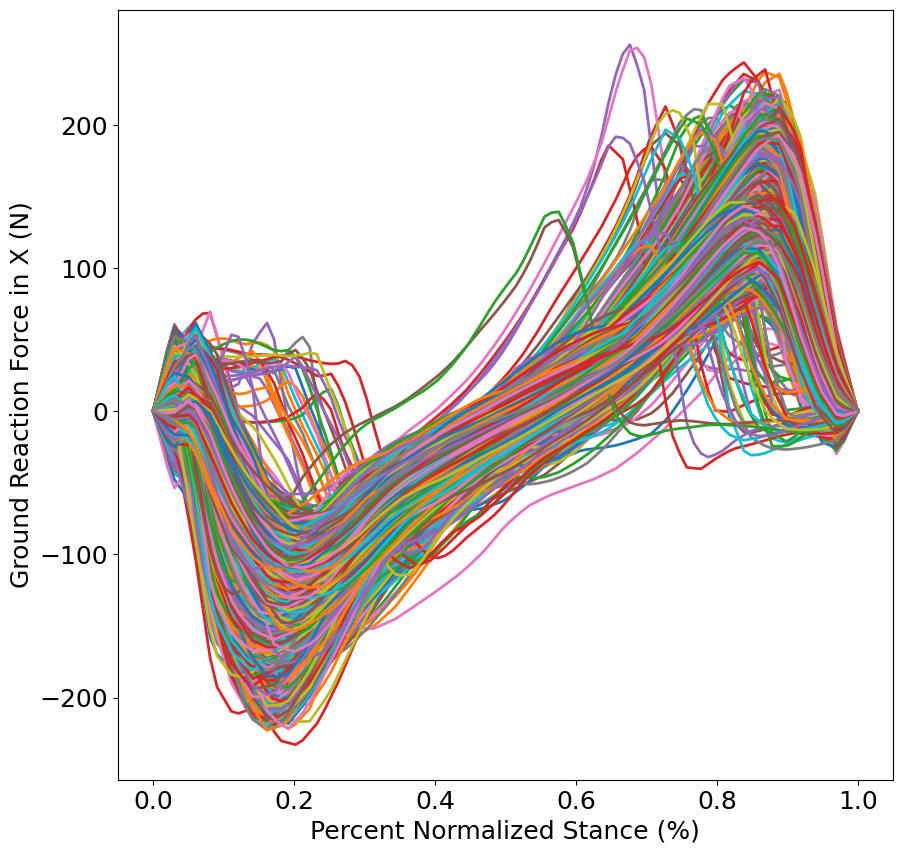

In [10]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_x_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i], grf_x_resampled[i], linewidth=2)

plt.ylabel("Ground Reaction Force in X (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance (%)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

In [11]:
grf_z_resampled, time_resampled = interp_segments(grf_z_segments, n_interp_points)

(array([-150., -125., -100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,
          75.]),
 [Text(0, -150.0, '−150'),
  Text(0, -125.0, '−125'),
  Text(0, -100.0, '−100'),
  Text(0, -75.0, '−75'),
  Text(0, -50.0, '−50'),
  Text(0, -25.0, '−25'),
  Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75')])

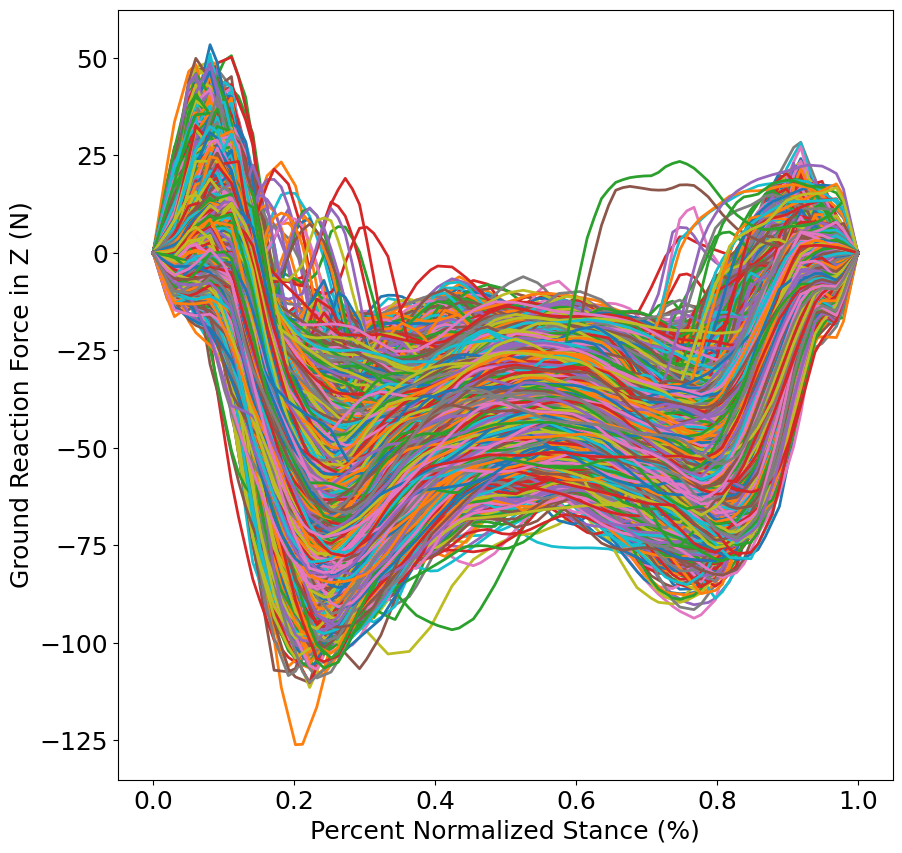

In [12]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_z_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i], grf_z_resampled[i], linewidth=2)

plt.ylabel("Ground Reaction Force in Z (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance (%)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

In [13]:
tibpost_resampled, time_resampled = interp_segments(tibpost_segments, n_interp_points)
tibant_resampled, time_resampled = interp_segments(tibant_segments, n_interp_points)
edl_resampled, time_resampled = interp_segments(edl_segments, n_interp_points)
ehl_resampled, time_resampled = interp_segments(ehl_segments, n_interp_points)
fdl_resampled, time_resampled = interp_segments(fdl_segments, n_interp_points)
fhl_resampled, time_resampled = interp_segments(fhl_segments, n_interp_points)
gaslat_resampled, time_resampled = interp_segments(gaslat_segments, n_interp_points)
gasmed_resampled, time_resampled = interp_segments(gasmed_segments, n_interp_points)
soleus_resampled, time_resampled = interp_segments(soleus_segments, n_interp_points)
perbrev_resampled, time_resampled = interp_segments(perbrev_segments, n_interp_points)
perlong_resampled, time_resampled = interp_segments(perlong_segments, n_interp_points)

achilles_resampled, time_resampled = interp_segments(achilles_segments, n_interp_points)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(0, -1000.0, '−1000'),
  Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000')])

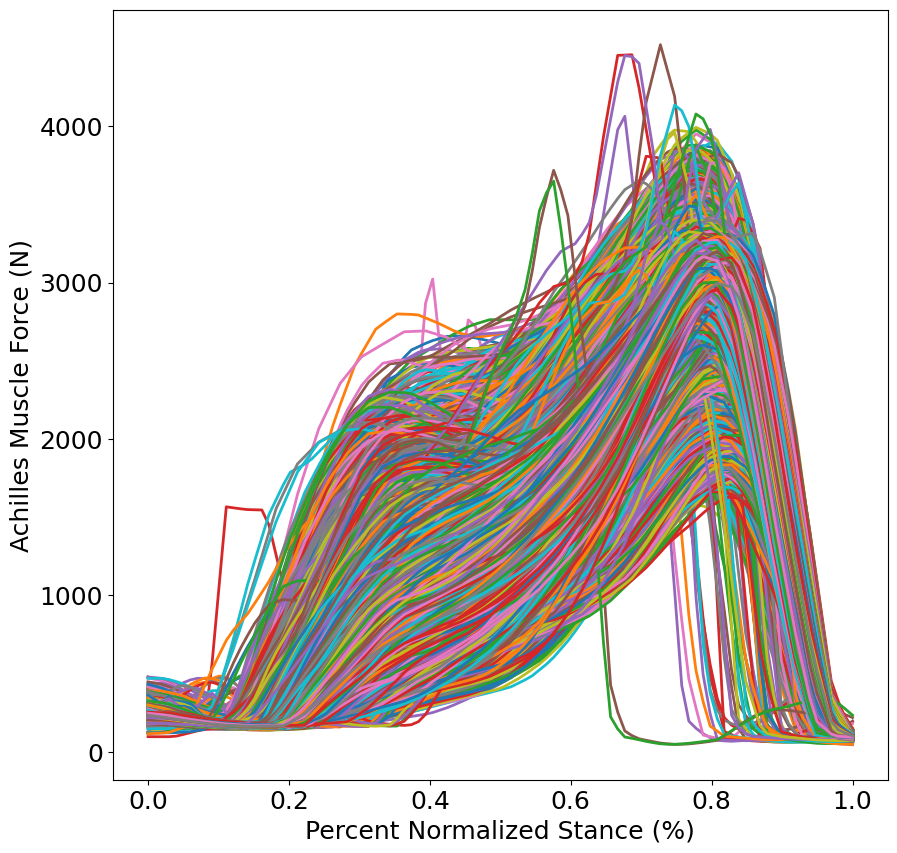

In [14]:
figure = plt.figure(figsize=(10, 10))

num_achilles_segments = len(achilles_resampled)

for i in range(num_achilles_segments):
    plt.plot(time_resampled[i], achilles_resampled[i], linewidth=2)

plt.ylabel("Achilles Muscle Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance (%)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 5000])

In [15]:
grf = np.stack((grf_x_resampled, grf_y_resampled, grf_z_resampled), axis=-1)
grf.shape

(13388, 100, 3)

In [16]:
np.save("..\data\grf.npy", grf)

In [17]:
grf_flattened = np.hstack((grf_x_resampled, grf_y_resampled, grf_z_resampled))
grf_flattened.shape

(13388, 300)

In [19]:
np.save("..\data\grf_flattened.npy", grf_flattened)

In [20]:
muscle = np.stack((tibpost_resampled, tibant_resampled, edl_resampled, ehl_resampled, fdl_resampled, fhl_resampled, perbrev_resampled, perlong_resampled, achilles_resampled), axis=-1)
muscle.shape

(13388, 100, 9)

In [21]:
np.save("..\data\muscle.npy", muscle)

In [22]:
muscle_flattened = np.hstack((tibpost_resampled, tibant_resampled, edl_resampled, ehl_resampled, fdl_resampled, fhl_resampled, perbrev_resampled, perlong_resampled, achilles_resampled))
muscle_flattened.shape

(13388, 900)

In [23]:
np.save("..\data\muscle_flattened.npy", muscle_flattened)